In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from utility import analysis_parameters as ap
from utility import util
import numpy as np
import dask
# from dask.diagnostics import ProgressBar
# pbar = ProgressBar()
# pbar.register()

colors = ap.COLORS
region="TWP"


# Plot spatiotemporal mean of OLR and IWP

In [7]:
olr2_means = {}
olr1_means = {}

olr2_means["OBS"] = xr.open_dataset(ap.CERES_SYN1_ANN_MEAN_DY2)["adj_atmos_sw_up_all_toa_3h"]
olr1_means["OBS"] = xr.open_dataset(ap.CERES_SYN1_ANN_MEAN_DY1)["adj_atmos_sw_up_all_toa_3h"]

In [8]:
models2_rlt = ["ICONr0.1deg", "ARPr0.1deg", "SAMr0.1deg", "SCREAMr0.1deg", "IFS"]
models2_rlut = ["GEOSr0.1deg", "SHiELDr0.1deg", "UM"]
print("DYAMOND2...")
for m in models2_rlt:
    print("\t",m,"rlt")
    olr2_means[m] = (xr.open_dataset(ap.get_file(m, region, "rlt")))["rlt"].mean()
for m in models2_rlut:
    print("\t",m,"rlut")
    olr2_means[m] = xr.open_dataset(ap.get_file(m, region, "rlut"))["rlut"].mean()
print("...done.\n\nDYAMOND1...")
models1_rlt = ["NICAM","FV3","ICON","SAM","IFS","MPAS","ARP","UM","GEOS"]
for m in models1_rlt:
    print("\t",m,"rlt")
    olr1_means[m] = xr.open_dataset(ap.get_dyamond1(m))["rlt"].mean()
print("...done.")


DYAMOND2...
	 ICONr0.1deg rlt
	 ARPr0.1deg rlt
	 SAMr0.1deg rlt
	 SCREAMr0.1deg rlt
	 IFS rlt
	 GEOSr0.1deg rlut
	 SHiELDr0.1deg rlut
	 UM rlut
...done.

DYAMOND1...
	 NICAM rlt
	 FV3 rlt
	 ICON rlt
	 SAM rlt
	 IFS rlt
	 MPAS rlt
	 ARP rlt
	 UM rlt
	 GEOS rlt
...done.


OBS OBS
None NICAM
SHiELDr0.1deg FV3
ICONr0.1deg ICON
SAMr0.1deg SAM
IFS IFS
None MPAS
ARPr0.1deg ARP
UM UM
SCREAMr0.1deg None
GEOSr0.1deg GEOS


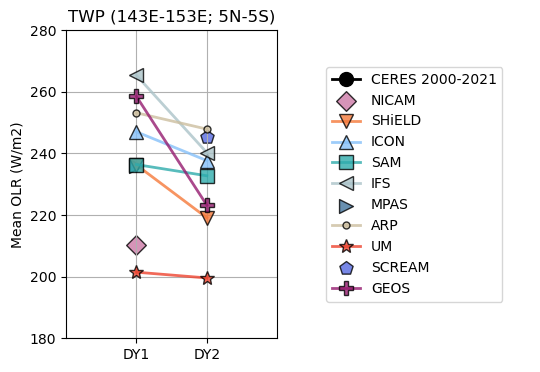

In [9]:
plot2_models = ["OBS", None, "SHiELDr0.1deg", "ICONr0.1deg", "SAMr0.1deg", "IFS", None,
               "ARPr0.1deg","UM","SCREAMr0.1deg", "GEOSr0.1deg"]
plot1_models = ["OBS", "NICAM", "FV3", "ICON", "SAM", "IFS", "MPAS", 
               "ARP","UM",None, "GEOS"]
markers=['o','D','v','^','s','<','>','.','*','p','P']
fig, [ax,leg] = plt.subplots(1,2, figsize=(6,4))
for i in range(len(plot_models)):
    print(plot_models[i], plot1_models[i])
    if plot_models[i] == "OBS":
        model_name = "OBS"
        ax.plot([2.2,0.8],[olr2_means[plot_models[i]].mean(),olr1_means[plot1_models[i]].mean()], 
                    marker=markers[i], markersize=10, linewidth=2, mec='k', 
                    color=colors[model_name], label="CERES 2000-2021")
        ax.plot([2.2]*2,[olr2_means[plot_models[i]].min(),olr2_means[plot_models[i]].max()], 
                   marker="_", color=colors[model_name], markersize=10)
        ax.plot([0.8]*2,[olr1_means[plot1_models[i]].min(),olr1_means[plot1_models[i]].max()], 
                   marker="_", color=colors[model_name], markersize=10)
    elif plot_models[i] is not None:
        model_name = plot_models[i].split("r")[0]
        if plot1_models[i] is not None:
            ax.plot([2,1],[olr2_means[plot_models[i]],olr1_means[plot1_models[i]]], 
                    marker=markers[i], markersize=10, linewidth=2, mec='k', alpha=0.8,
                    color=colors[model_name], label=model_name)
        else:
            ax.scatter([2],[olr2_means[plot_models[i]]], 
                       marker=markers[i], s=100, c=colors[model_name], edgecolors='k', alpha=0.8,label=model_name)
    else:
        model_name = plot1_models[i]
        ax.scatter([1],[olr1_means[plot1_models[i]]], 
                   marker=markers[i], s=100, c=colors[model_name], edgecolors='k', alpha=0.8,label=model_name)
    
ax.set_ylim([180,280])
ax.grid()
ax.set_xlim([0,3])
ax.set_xticks([1,2])
ax.set_xticklabels(["DY1","DY2"])
ax.set_ylabel("Mean OLR (W/m2)")
ax.set_title("TWP (143E-153E; 5N-5S)")

h, l = ax.get_legend_handles_labels()
leg.legend(h, l, loc=6)
leg.axis("off")

plt.savefig("../plots/TWP/mean_OLR.png",transparent=True)
plt.show()


# mean SWU


In [10]:
import xarray as xr
import matplotlib.pyplot as plt
from utility import analysis_parameters as ap
from utility import util
import numpy as np
import dask
colors = ap.COLORS
region="TWP"

In [11]:
swu2_means = {}
swu1_means = {}

swu2_means["OBS"] = xr.open_dataset(ap.CERES_SYN1_ANN_MEAN_DY2)["adj_atmos_sw_up_all_toa_3h"]
swu1_means["OBS"] = xr.open_dataset(ap.CERES_SYN1_ANN_MEAN_DY1)["adj_atmos_sw_up_all_toa_3h"]

In [14]:
models2_rsut = ["GEOSr0.1deg", "SHiELD", "UM", "ICON"]

print("DYAMOND2...")
print("\t SCREAM rsut = rsdt - rst")
sc_rsdt = xr.open_dataset(ap.get_file("SCREAMr0.1deg",region,"rsdt")).rsdt
sc_rst = xr.open_dataset(ap.get_file("SCREAMr0.1deg",region,"rst")).rst
swu2_means["SCREAMr0.1deg"] = (sc_rsdt - sc_rst).mean()
del sc_rst

print("\t SAM rsut = rsdt(SCREAM) - rst")
sa_rst = xr.open_dataset(ap.get_file("SAMr0.1deg",region,"rst")).rst
swu2_means["SAMr0.1deg"] = (sc_rsdt[1:].values - sa_rst).mean()
del sa_rst

print("\t ARP rsut = rsdt(SCREAM) - rst")
ar_rst = xr.open_dataset(ap.get_file("ARPr0.1deg",region,"rst")).rst
swu2_means["ARPr0.1deg"] = (sc_rsdt.values - ar_rst).mean()
del ar_rst, sc_rsdt

for m in models2_rsut:
    print("\t",m,"rsut")
    swu2_means[m] = xr.open_dataset(ap.get_file(m, region, "rsut"))["rsut"].mean()

print("...done.\n\nDYAMOND1...")
models1_rsut = ["NICAM","FV3","ICON","UM"]
# calculate rsut from rst 
m="SAM"
print("\t",m,"rst --> rsut")
swn = xr.open_dataset(ap.get_dyamond1(m,var="rst"))["rst"]
swd = xr.open_dataset(ap.get_dyamond1("FV3",var="rsdt"))["rsdt"].sel(time=swn.time)
swu = swd.values-swn
swu1_means[m] = swu.mean()
del swn, swd, swu
m="IFS"
print("\t",m,"rst --> rsut")
swn = xr.open_dataset(ap.get_dyamond1(m,var="rst"))["rst"]
swd = xr.open_dataset(ap.get_dyamond1("FV3",var="rsdt"))["rsdt"].sel(time=swn.time)
swu = swd.values-swn
swu1_means[m] = swu.mean()
del swn, swd, swu
m="ARP"
print("\t",m,"rst --> rsut")
swn = xr.open_dataset(ap.get_dyamond1(m,var="rst"))["rst"]
swd = xr.open_dataset(ap.get_dyamond1("FV3",var="rsdt"))["rsdt"].sel(time=swn.time)
swu = swd.values-swn
swu1_means[m] = swu.mean()
del swn, swd, swu
m="MPAS"
print("\t",m,"rst --> rsut")
swn = xr.open_dataset(ap.get_dyamond1(m,var="rst"))["rst"]
swd = xr.open_dataset(ap.get_dyamond1("FV3",var="rsdt"))["rsdt"]
swu = swd.values-swn
swu1_means[m] = swu.mean()
del swn, swd, swu
for m in models1_rsut:
    print("\t",m,"rsut")
    swu1_means[m] = xr.open_dataset(ap.get_dyamond1(m,var="rsut"))["rsut"].mean()
print("...done.")

DYAMOND2...
	 SCREAM rsut = rsdt - rst
	 SAM rsut = rsdt(SCREAM) - rst
	 ARP rsut = rsdt(SCREAM) - rst
	 GEOSr0.1deg rsut
	 SHiELD rsut
	 UM rsut
	 ICON rsut
...done.

DYAMOND1...
	 SAM rst --> rsut
	 IFS rst --> rsut
	 ARP rst --> rsut
	 MPAS rst --> rsut
	 NICAM rsut
	 FV3 rsut
	 ICON rsut
	 UM rsut
...done.


In [13]:
swu1_means

{'SAM': <xarray.DataArray 'rst' ()>
 array(82.974, dtype=float32),
 'IFS': <xarray.DataArray 'rst' ()>
 array(73.92781, dtype=float32),
 'ARP': <xarray.DataArray 'rst' ()>
 array(70.76338, dtype=float32),
 'MPAS': <xarray.DataArray 'rst' ()>
 array(93.60643, dtype=float32),
 'NICAM': <xarray.DataArray 'rsut' ()>
 array(94.906044, dtype=float32),
 'FV3': <xarray.DataArray 'rsut' ()>
 array(115.60414, dtype=float32),
 'ICON': <xarray.DataArray 'rsut' ()>
 array(92.16574, dtype=float32),
 'UM': <xarray.DataArray 'rsut' ()>
 array(134.28209, dtype=float32)}

OBS OBS
None NICAM
SHiELD FV3
ICON ICON
SAMr0.1deg SAM
None IFS
None MPAS
ARPr0.1deg ARP
UM UM
SCREAMr0.1deg None
GEOSr0.1deg None


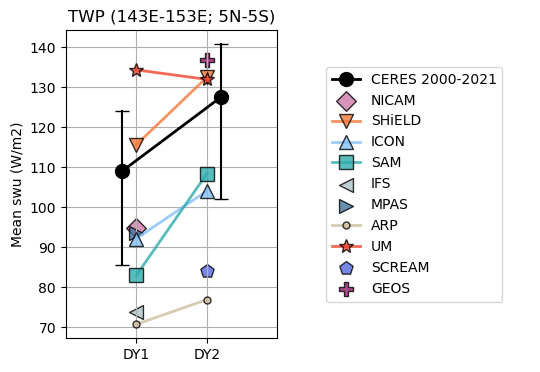

In [17]:
# plot
plot2_models = ["OBS",None, "SHiELD", "ICON", "SAMr0.1deg", None, None,
               "ARPr0.1deg","UM","SCREAMr0.1deg", "GEOSr0.1deg"]
plot1_models = ["OBS", "NICAM", "FV3", "ICON", "SAM", "IFS", "MPAS", 
               "ARP","UM",None, None]
markers=['o','D','v','^','s','<','>','.','*','p','P']
fig, [ax,leg] = plt.subplots(1,2, figsize=(6,4))
for i in range(len(plot2_models)):
    print(plot2_models[i], plot1_models[i])
    if plot2_models[i] == "OBS":
        model_name = "OBS"
        ax.plot([2.2]*2,[swu2_means[plot2_models[i]].min(),swu2_means[plot2_models[i]].max()], 
                   marker="_", color=colors[model_name], markersize=10)
        if plot1_models[i] is not None:
            ax.plot([2.2,0.8],[swu2_means[plot2_models[i]].mean(),swu1_means[plot1_models[i]].mean()], 
                    marker=markers[i], markersize=10, linewidth=2, mec='k', 
                    color=colors[model_name], label="CERES 2000-2021")
            ax.plot([0.8]*2,[swu1_means[plot1_models[i]].min(),swu1_means[plot1_models[i]].max()], 
                       marker="_", color=colors[model_name], markersize=10)
    elif plot2_models[i] is not None:
        model_name = plot_models[i].split("r")[0]
        if plot1_models[i] is not None:
            ax.plot([2,1],[swu2_means[plot2_models[i]],swu1_means[plot1_models[i]]], 
                    marker=markers[i], markersize=10, linewidth=2, mec='k', alpha=0.8,
                    color=colors[model_name], label=model_name)
        else:
            ax.scatter([2],[swu2_means[plot2_models[i]]], 
                       marker=markers[i], s=100, c=colors[model_name], edgecolors='k', alpha=0.8,label=model_name)
    else:
        model_name = plot1_models[i]
        ax.scatter([1],[swu1_means[plot1_models[i]]], 
                   marker=markers[i], s=100, c=colors[model_name], edgecolors='k', alpha=0.8,label=model_name)
    
# ax.set_ylim([60,150])
ax.grid()
ax.set_xlim([0,3])
ax.set_xticks([1,2])
ax.set_xticklabels(["DY1","DY2"])
ax.set_ylabel("Mean swu (W/m2)")
ax.set_title("TWP (143E-153E; 5N-5S)")

h, l = ax.get_legend_handles_labels()
leg.legend(h, l, loc=6)
leg.axis("off")

plt.savefig("../plots/TWP/mean_swu.png",transparent=True)
plt.show()

# plot olr vs swu mean

In [3]:
import scipy.stats as ss
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from utility import analysis_parameters as ap
colors = ap.COLORS
region="TWP"

In [4]:
olr1 = xr.open_dataset(ap.TWP_MEANOLR_DY1)
olr2 = xr.open_dataset(ap.TWP_MEANOLR_DY2)
swu1 = xr.open_dataset(ap.TWP_MEANSWU_DY1)
swu2 = xr.open_dataset(ap.TWP_MEANSWU_DY2)

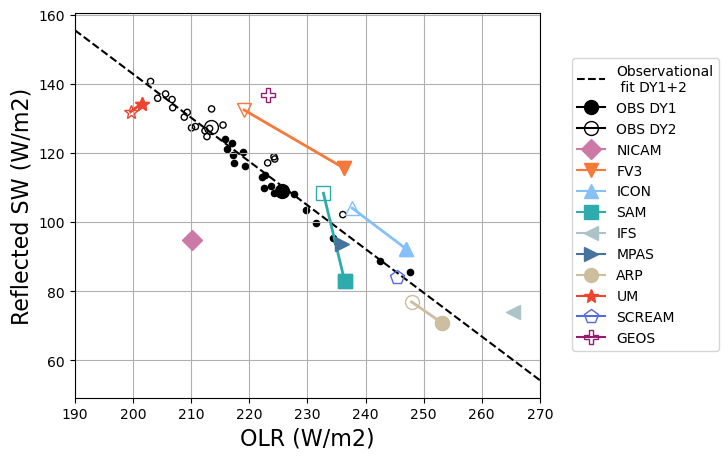

In [5]:
plot2_models = ["OBS", None, "SHiELDr0.1deg", "ICONr0.1deg", "SAMr0.1deg", None, None,
               "ARPr0.1deg","UM","SCREAMr0.1deg", "GEOSr0.1deg"]
plot1_models = ["OBS", "NICAM", "FV3", "ICON", "SAM", "IFS", "MPAS", 
               "ARP","UM",None, None]
markers=['o','D','v','^','s','<','>','o','*','p','P']

fig, ax = plt.subplots(1,1, figsize=(6,5))
a1, a2 = 1, 1
for i in range(len(plot2_models)):
    if plot2_models[i] is not None:
        if plot2_models[i]=="OBS":
            d2_swu = xr.open_dataset(ap.CERES_SYN1_ANN_MEAN_DY2)["adj_atmos_sw_up_all_toa_3h"]
            d1_swu = xr.open_dataset(ap.CERES_SYN1_ANN_MEAN_DY1)["adj_atmos_sw_up_all_toa_3h"]
            d2_olr = xr.open_dataset(ap.CERES_SYN1_ANN_MEAN_DY2)["adj_atmos_lw_up_all_toa_3h"]
            d1_olr = xr.open_dataset(ap.CERES_SYN1_ANN_MEAN_DY1)["adj_atmos_lw_up_all_toa_3h"]
            m1, b1, r1, p1, se1 = ss.linregress(d1_olr, d1_swu)
            m2, b2, r2, p2, se2 = ss.linregress(d2_olr, d2_swu)
            m3, b3, r3, p3, se3 = ss.linregress(np.append(d2_olr,d1_olr), np.append(d2_swu,d1_swu))
            x = np.arange(190,271,2)
            # ax.plot(x, m1*x+b1, "k", alpha=a1, label="Linear fit DY1")
            # ax.plot(x, m2*x+b2, "k", alpha=a2, label="Linear fit DY2")
            ax.plot(x, m3*x+b3, "k", alpha=a2, linestyle="dashed", label="Observational\n fit DY1+2")
            ax.scatter(d2_olr, d2_swu, ec="k", marker="o", alpha=a2, s=20, facecolors="none")
            ax.scatter(d1_olr, d1_swu, c="k", marker="o", alpha=a1, s=20)
            ax.plot([d1_olr.mean()],[d1_swu.mean()], c="k", 
                    markersize=10, marker=markers[i], alpha=a1, label="OBS DY1")
            ax.plot([d2_olr.mean()],[d2_swu.mean()], c="k", fillstyle="none",
                    markersize=10, marker=markers[i], alpha=a2, label="OBS DY2")
            # m, b = -1, (d1_olr.mean()+d1_swu.mean()).values
            # x = np.arange(190,271,2)
            # ax.plot(x, m*x+b, "k", linestyle="-.", label="Linear fit")
        else:
            # models
            if plot1_models[i] is not None:
                ax.plot([olr1[plot1_models[i]],olr2[plot2_models[i]]], [swu1[plot1_models[i]],swu2[plot2_models[i]]], color=colors[plot1_models[i]], 
                        alpha=a1, marker=markers[i], markersize=10, linewidth=2, fillstyle="none")
                ax.plot(olr1[plot1_models[i]], swu1[plot1_models[i]], c=colors[plot1_models[i].split("r")[0]], 
                        alpha=a1, marker=markers[i], markersize=10, label=plot1_models[i]) 
            else:
                ax.plot(olr2[plot2_models[i]], swu2[plot2_models[i]], c=colors[plot2_models[i].split("r")[0]], 
                        alpha=a2, marker=markers[i], markersize=10, fillstyle="none", label=plot2_models[i].split("r")[0])        
    elif plot1_models[i] is not None:
            ax.plot(olr1[plot1_models[i]], swu1[plot1_models[i]], c=colors[plot1_models[i]], 
                        alpha=a1, marker=markers[i], markersize=10, label=plot1_models[i])

plt.grid(True)
plt.xlim([190,270])
plt.xlabel("OLR (W/m2)", fontsize=16)
plt.ylabel("Reflected SW (W/m2)", fontsize=16)
plt.legend(bbox_to_anchor=(1.4,0.9))
plt.savefig("../plots/TWP/mean_OLRvsSWU.png", dpi=150, bbox_inches="tight", pad_inches=1)
plt.show()